In [1]:
# %%
# create data use DWT and fuzz c-mean
# logic matrix sau khi qua tiền xử lý là DWT sẽ được tính fuzz c-mean
# sau đó lưu lại data set với lượng feature mới

import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
import os
from scipy.io import loadmat
from scipy.interpolate import interp1d
directory = '../Dataset/Chuong Duong'

all_data = {}

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.mat'):
        filepath = os.path.join(directory, filename)
        # Load the .mat file and add its contents to the dictionary
        mat_data = loadmat(filepath)
        
        # Use filename (without extension) as key for the data
        key = os.path.splitext(filename)[0]
        all_data[key] = mat_data['acceleration']
        print(filepath)
        print(mat_data)

../Dataset/Chuong Duong/ChuongDuong5.mat
{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Aug  5 13:22:10 2024', '__version__': '1.0', '__globals__': [], 'acceleration': array([[ 0.00000000e+00, -1.76938762e-05,  1.93218752e-05, ...,
         3.20232276e-05,  3.98200632e-05,  0.00000000e+00],
       [ 0.00000000e+00, -2.74850791e-05,  3.98295374e-05, ...,
         5.82745773e-05,  6.57308542e-05,  0.00000000e+00],
       [ 0.00000000e+00, -3.22212570e-05,  5.97583067e-05, ...,
         7.95689663e-05,  8.19141888e-05,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  9.58576323e-06,  1.43233287e-05, ...,
         3.47126009e-05,  6.43548549e-05,  0.00000000e+00],
       [ 0.00000000e+00,  1.98457594e-05,  2.23331376e-05, ...,
         3.18232324e-05,  4.55212093e-05,  0.00000000e+00],
       [ 0.00000000e+00,  2.54074286e-05,  2.37467243e-05, ...,
         1.95918117e-05,  1.24411731e-05,  0.00000000e+00]])}
../Dataset/Chuong Duong/ChuongDuong8.mat
{'__hea

In [3]:
keys_to_stack = [f'ChuongDuong{i}' for i in range(11)]
input_data = np.stack([all_data[key] for key in keys_to_stack], axis=0)
print(all_data.keys)

# Create the corresponding labels
output_labels = np.linspace(0,10,11)  # Using 0 and 1 as class labels for binary cross-entropy
labels = output_labels

input_data = input_data[:,:,:40000]
input_data.shape, output_labels.shape

<built-in method keys of dict object at 0x7f35a2dd9c40>


((11, 40, 40000), (11,))

(40, 40000)


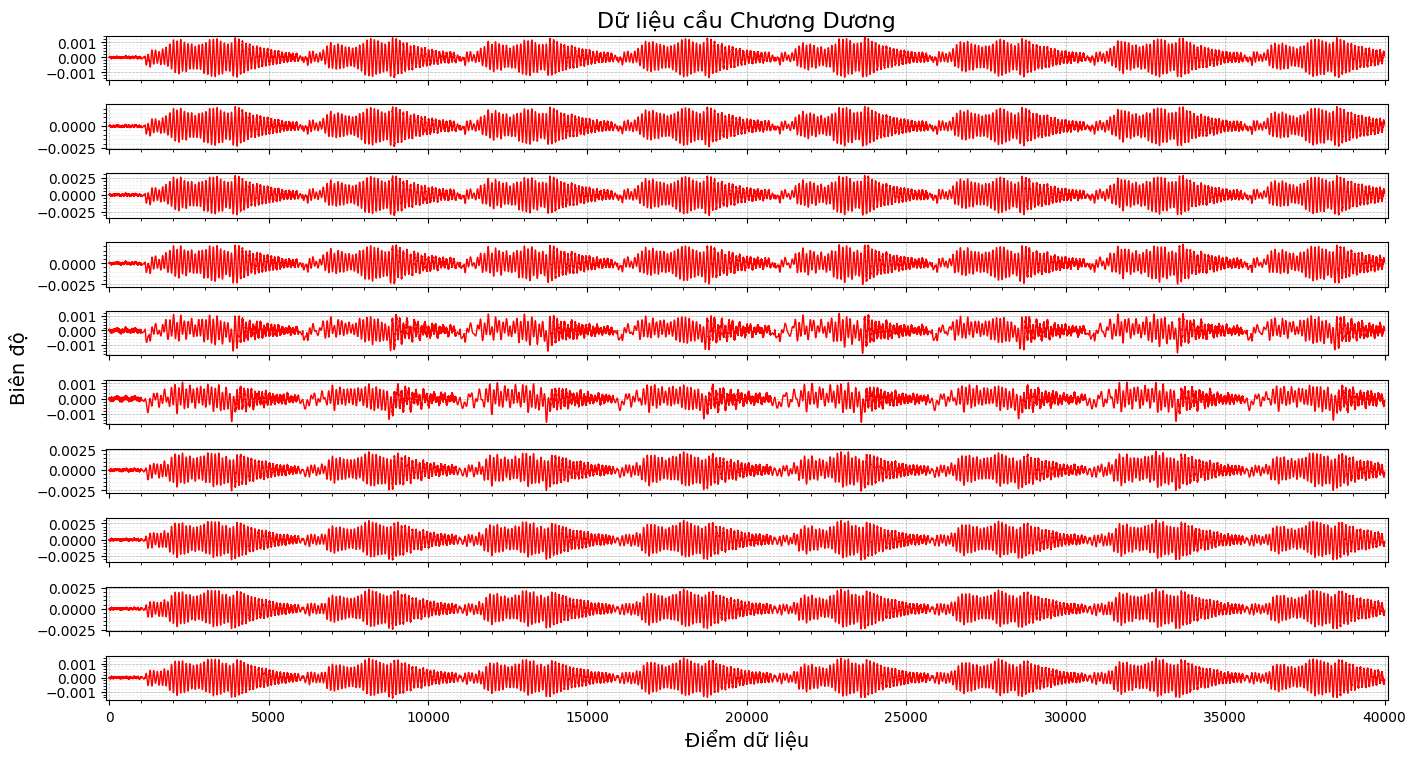

In [4]:
# Select the data at index (1, 1, :) which has a shape of (50000,)
Data = input_data[5, :, :]
print(Data.shape)
# Create the plot
fig, axes = plt.subplots(input_data.shape[1]-30, 1, figsize=(15, 8), sharex=True)


plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.family'] = 'sans-serif'
#print(axes)
# Plot the data for each sub-array
for i, ax in enumerate(axes):
    ax.plot(Data[i, :], linewidth=1, color = 'r')
    # ax.set_title(f'Z24 Signal Data at Index (1, {i}, :)', fontsize=12)
    
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.minorticks_on()
    ax.grid(True, which='minor', color='#999999', linestyle='--', alpha=0.2)
    ax.set_xlim(-100, Data.shape[1]+100)
# Set common labels using axes
axes[-1].set_xlabel('Điểm dữ liệu', fontsize=14)
axes[0].set_title('Dữ liệu cầu Chương Dương', fontsize=16)

# Create a "super" axis for the common Y-label and make it invisible
super_ax = fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
super_ax.set_ylabel("Biên độ", fontsize=14, labelpad=15)

# Move the super axis ylabel to avoid overlap with subplots
super_ax.yaxis.set_label_coords(-0.06,0.5)

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.show()

In [5]:

import random

def augment_time_series_data(input_data, labels, num_augmentations=5):
    """
    Augment time series data.

    :param input_data: Original time series data array.
    :param labels: Corresponding labels for the data.
    :param num_augmentations: Number of augmented samples to generate per original sample.

    :return: Augmented data array and corresponding labels.
    """
    augmented_data = []
    augmented_labels = []

    num_samples, num_channels, sequence_length = input_data.shape
    #print (sequence_length)

    for i in range(num_samples):
        for _ in range(num_augmentations):
            # Choose a random augmentation technique
            augmentation_type = random.choice(['noise', 'reverse', 'crop_pad'])

            if augmentation_type == 'noise':
                # Add random noise
                noise = np.random.normal(0, 0.001, input_data[i].shape)
                augmented_sample = input_data[i] + noise

            elif augmentation_type == 'reverse':
                # Reverse the sequence
                augmented_sample = np.flip(input_data[i], axis=-1)

            elif augmentation_type == 'crop_pad':
                # Crop and pad the sequence
                crop_size = random.randint(0, sequence_length // 100)
                padded_sample = np.pad(input_data[i], ((0, 0), (crop_size, 0)), mode='constant', constant_values=0)
                augmented_sample = padded_sample[:, :-crop_size]

            augmented_data.append(augmented_sample)
            augmented_labels.append(labels[i])

    # Convert to numpy arrays
    augmented_data = np.array(augmented_data)
    augmented_labels = np.array(augmented_labels)

    return augmented_data, augmented_labels

# Sử dụng hàm
augmented_data, augmented_labels = augment_time_series_data(input_data, output_labels)
print(augmented_data.shape, augmented_labels.shape)

KeyboardInterrupt: 

(40, 40000)


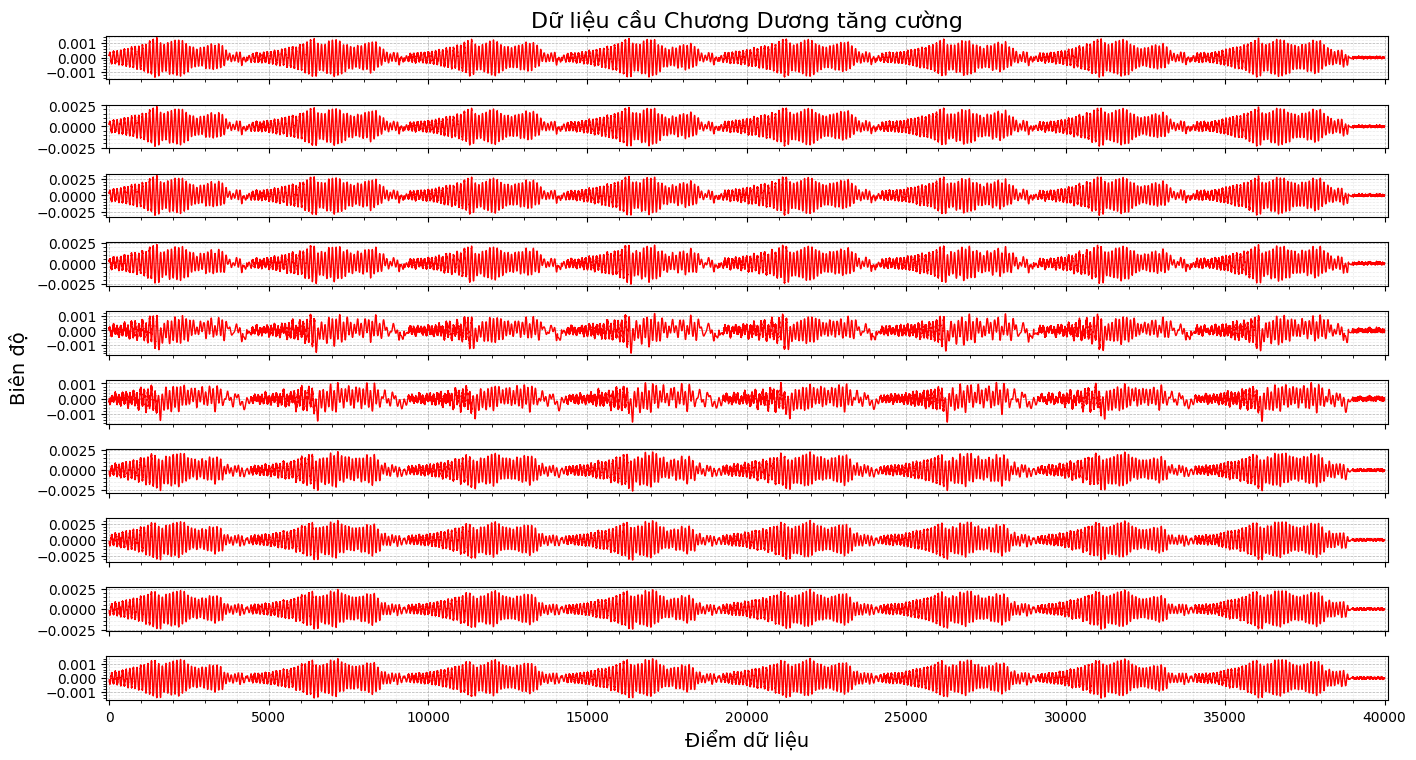

In [ ]:
# Select the data at index (1, 1, :) which has a shape of (50000,)
Data = augmented_data[18, :, :]
print(Data.shape)
# Create the plot
fig, axes = plt.subplots(input_data.shape[1]-30, 1, figsize=(15, 8), sharex=True)


plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.family'] = 'sans-serif'
#print(axes)
# Plot the data for each sub-array
for i, ax in enumerate(axes):
    ax.plot(Data[i, :], linewidth=1, color = 'r')
    # ax.set_title(f'Z24 Signal Data at Index (1, {i}, :)', fontsize=12)
    
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.minorticks_on()
    ax.grid(True, which='minor', color='#999999', linestyle='--', alpha=0.2)
    ax.set_xlim(-100, Data.shape[1]+100)
# Set common labels using axes
axes[-1].set_xlabel('Điểm dữ liệu', fontsize=14)
axes[0].set_title('Dữ liệu cầu Chương Dương tăng cường', fontsize=16)

# Create a "super" axis for the common Y-label and make it invisible
super_ax = fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
super_ax.set_ylabel("Biên độ", fontsize=14, labelpad=15)

# Move the super axis ylabel to avoid overlap with subplots
super_ax.yaxis.set_label_coords(-0.06,0.5)

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

def reshape_time_series_data_v8(input_data, label_data, segments_per_new_sample, segment_length):
    """
    Reshape time series data and corresponding labels into a specified shape.

    :param input_data: Original time series data array.
    :param label_data: Corresponding labels for the data.
    :param segments_per_new_sample: Number of segments per new sample.
    :param segment_length: Length of each segment.

    :return: Reshaped data array and corresponding labels.
    """
    num_samples_original, num_channels, length_original = input_data.shape

    # Validate the feasibility of reshaping
    if length_original % segment_length != 0:
        raise ValueError("Segment length must evenly divide the original length.")

    total_segments_per_original_sample = (length_original // segment_length) * num_channels
    num_samples_new = (num_samples_original * total_segments_per_original_sample) // segments_per_new_sample

    # Validate if reshaping is possible
    if (num_samples_original * total_segments_per_original_sample) % segments_per_new_sample != 0:
        raise ValueError("Reshaping not possible with the given dimensions.")

    # Initialize reshaped data and labels
    new_shape = (num_samples_new, segments_per_new_sample, segment_length)
    reshaped_data = np.zeros(new_shape)
    reshaped_labels = np.zeros(num_samples_new)

    # Reshape the data and labels
    count = 0
    for i in range(num_samples_original):
        segment_count = 0
        for j in range(num_channels):
            for k in range(length_original // segment_length):
                start_idx = k * segment_length
                end_idx = start_idx + segment_length
                reshaped_data[count, segment_count % segments_per_new_sample, :] = input_data[i, j, start_idx:end_idx]
                if (segment_count + 1) % segments_per_new_sample == 0:
                    reshaped_labels[count] = label_data[i]  # Assign corresponding label
                    count += 1
                segment_count += 1

    return reshaped_data, reshaped_labels

# Example usage
segments_per_new_sample = 8
segment_length = 5000

# Assume 'augmented_data' and 'augmented_labels' are your input data and labels
reshaped_data, reshaped_labels = reshape_time_series_data_v8(augmented_data, augmented_labels, segments_per_new_sample, segment_length)
print(reshaped_data.shape, reshaped_labels.shape)


(2200, 8, 5000) (2200,)


(8, 5000)


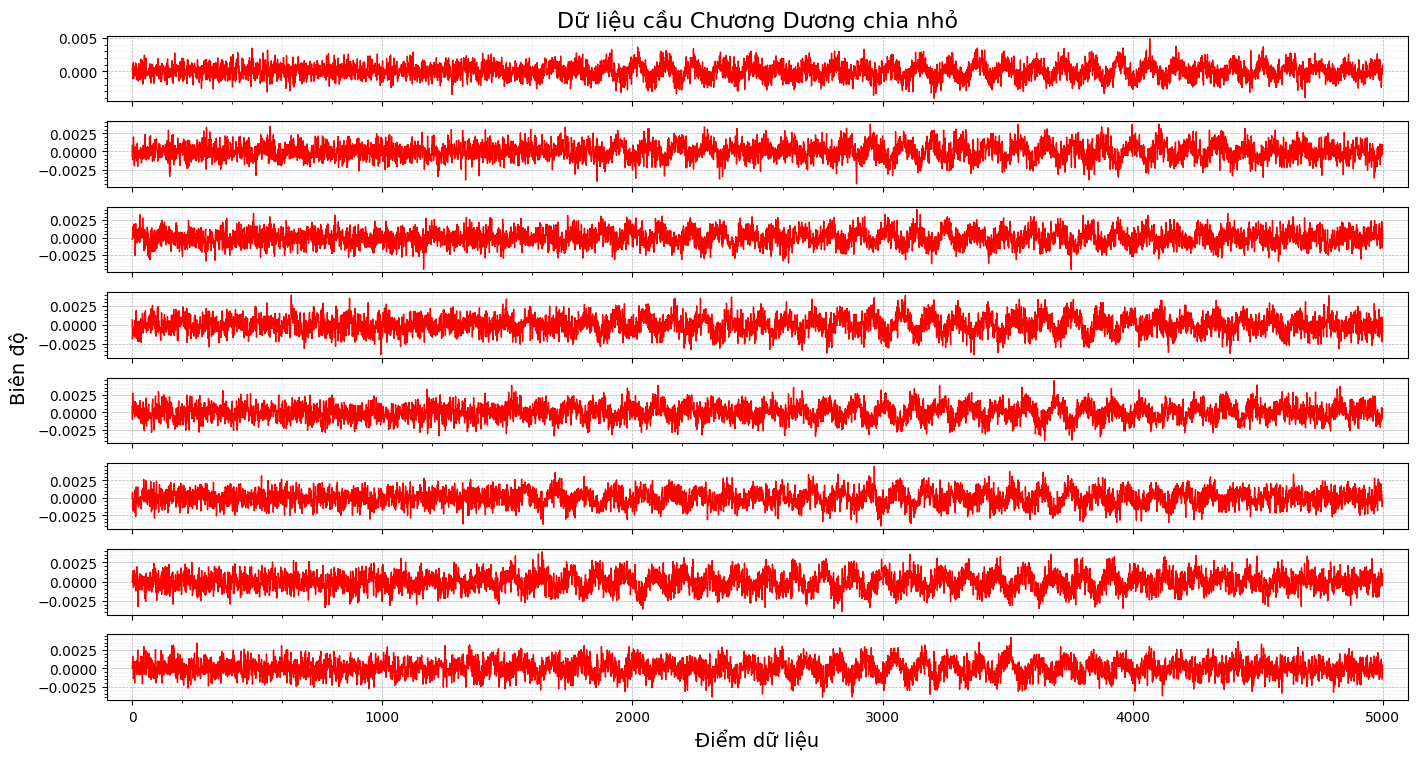

In [ ]:

# Select the data at index (1, 1, :) which has a shape of (8000,)
Data = reshaped_data[200, :, :] #150 -> 200
print(Data.shape)
# Create the plot
fig, axes = plt.subplots(reshaped_data.shape[1], 1, figsize=(15, 8), sharex=True)

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.family'] = 'sans-serif'

# Plot the data for each sub-array
for i, ax in enumerate(axes):
    ax.plot(Data[i, :], linewidth=1, color = 'r')
    # ax.set_title(f'Z24 Signal Data at Index (1, {i}, :)', fontsize=12)
    
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.minorticks_on()
    ax.grid(True, which='minor', color='#999999', linestyle='--', alpha=0.2)
    ax.set_xlim(-100, Data.shape[1]+100)
# Set common labels using axes
axes[-1].set_xlabel('Điểm dữ liệu', fontsize=14)
axes[0].set_title('Dữ liệu cầu Chương Dương chia nhỏ', fontsize=16)

# Create a "super" axis for the common Y-label and make it invisible
super_ax = fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
super_ax.set_ylabel("Biên độ", fontsize=14, labelpad=15)

# Move the super axis ylabel to avoid overlap with subplots
super_ax.yaxis.set_label_coords(-0.06,0.5)

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.show()

In [ ]:

# input_train = reshaped_data
# output_train = reshaped_labels
# XXX_train, XXX_valid, y_train, y_valid = train_test_split(input_train, output_train, test_size=0.4, random_state=42)


# Assuming reshaped_data and reshaped_labels are defined
input_train = reshaped_data  # Original shape is (924, 10, 5000)
output_train = reshaped_labels

# Split the data into training and validation sets
XXX_train_reshaped, XXX_valid_reshaped, y_train, y_valid = train_test_split(input_train, output_train, test_size=0.2, random_state=42)

# Now, reshape XXX_train and XXX_valid from (N, 10, 5000) to (N, 5000, 10)
XXX_train = XXX_train_reshaped.reshape(XXX_train_reshaped.shape[0], 5000, 8)
XXX_valid = XXX_valid_reshaped.reshape(XXX_valid_reshaped.shape[0], 5000, 8)

# Print the shapes to verify
print(XXX_train.shape)
print(XXX_valid.shape)


(1760, 5000, 8)
(440, 5000, 8)


In [ ]:

# %%
XXX_train = np.reshape(XXX_train, (XXX_train.shape[0], XXX_train.shape[2], XXX_train.shape[1]))
XXX_valid = np.reshape(XXX_valid, (XXX_valid.shape[0], XXX_valid.shape[2], XXX_valid.shape[1]))

# # Transpose dữ liệu
# XXX_train = np.transpose(XXX_train, (0, 2, 1))  # Từ (1760, 8, 5000) sang (1760, 5000, 8)
# XXX_valid = np.transpose(XXX_valid, (0, 2, 1))  # Từ (440, 8, 5000) sang (440, 5000, 8)

label=np.unique(y_train)
print(XXX_train.shape)
print(XXX_valid.shape)


(1760, 8, 5000)
(440, 8, 5000)


<p> Base: <i>https://github.com/markmerchant415/Image-Classification-/blob/main/Image%20Classification.ipynb</i> </p>

In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding1D, BatchNormalization, Conv1D, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import glorot_uniform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import pandas as pd
import os
import matplotlib.pyplot as plt

<h2> Identity Block </h2>

In [ ]:
def identity_block_1d(X, f, filters):
    F1, F2, F3 = filters
    X_shortcut = X
    
    # First layer
    X = Conv1D(filters=F1, kernel_size=1, strides=1, padding='valid')(X)
    X = BatchNormalization(axis=2)(X)
    X = Activation('relu')(X)
    
    # Second layer
    X = Conv1D(filters=F2, kernel_size=f, strides=1, padding='same')(X)
    X = BatchNormalization(axis=2)(X)
    X = Activation('relu')(X)
    
    # Third layer
    X = Conv1D(filters=F3, kernel_size=1, strides=1, padding='valid')(X)
    X = BatchNormalization(axis=2)(X)
    
    # Add shortcut and apply ReLU
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

<h2>Convolutional Block</h2>

In [ ]:
def convolutional_block_1d(X, f, filters, s=2):
    F1, F2, F3 = filters
    X_shortcut = X
    
    # First layer
    X = Conv1D(F1, 1, strides=s)(X)
    X = BatchNormalization(axis=2)(X)
    X = Activation('relu')(X)
    
    # Second layer
    X = Conv1D(filters=F2, kernel_size=f, strides=1, padding='same')(X)
    X = BatchNormalization(axis=2)(X)
    X = Activation('relu')(X)
    
    # Third layer
    X = Conv1D(filters=F3, kernel_size=1, strides=1, padding='valid')(X)
    X = BatchNormalization(axis=2)(X)
    
    # Shortcut path
    X_shortcut = Conv1D(filters=F3, kernel_size=1, strides=s, padding='valid')(X_shortcut)
    X_shortcut = BatchNormalization(axis=2)(X_shortcut)
    
    # Add shortcut and apply ReLU
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

<h2>Creating ResNet 50</h2>

In [ ]:
def ResNet50_1D(input_shape, n_classes):
    # Input
    X_input = Input(input_shape)
    
    # First layer
    X = Conv1D(64, 7, strides=2, padding='same')(X_input)
    X = BatchNormalization(axis=2)(X)
    X = Activation('relu')(X)
    X = MaxPooling1D(pool_size=3, strides=2, padding='same')(X)
    
    # Stage 1: 3 identity blocks, 64 filters
    X = convolutional_block_1d(X, f=3, filters=[64, 64, 256], s=1)
    X = identity_block_1d(X, f=3, filters=[64, 64, 256])
    X = identity_block_1d(X, f=3, filters=[64, 64, 256])
    
    # Stage 2: 1 convolutional block + 3 identity blocks, 128 filters
    X = convolutional_block_1d(X, f=3, filters=[128, 128, 512], s=2)
    X = identity_block_1d(X, f=3, filters=[128, 128, 512])
    X = identity_block_1d(X, f=3, filters=[128, 128, 512])
    X = identity_block_1d(X, f=3, filters=[128, 128, 512])
    
    # Stage 3: 1 convolutional block + 5 identity blocks, 256 filters
    X = convolutional_block_1d(X, f=3, filters=[256, 256, 1024], s=2)
    X = identity_block_1d(X, f=3, filters=[256, 256, 1024])
    X = identity_block_1d(X, f=3, filters=[256, 256, 1024])
    X = identity_block_1d(X, f=3, filters=[256, 256, 1024])
    X = identity_block_1d(X, f=3, filters=[256, 256, 1024])
    X = identity_block_1d(X, f=3, filters=[256, 256, 1024])
    
    # Stage 4: 1 convolutional block + 2 identity blocks, 512 filters
    X = convolutional_block_1d(X, f=3, filters=[512, 512, 2048], s=2)
    X = identity_block_1d(X, f=3, filters=[512, 512, 2048])
    X = identity_block_1d(X, f=3, filters=[512, 512, 2048])
    
    # Last layer
    X = GlobalAveragePooling1D()(X)
    X = Dense(1024, activation='relu')(X)
    X = Dense(n_classes, activation='softmax')(X)
    
    # Create model
    model = Model(inputs=X_input, outputs=X)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
# Giả định dữ liệu đã được chuẩn bị
# XXX_train: (1760, 5000, 8), XXX_valid: (440, 5000, 8)
# y_train, y_valid: Nhãn số nguyên hoặc one-hot

# Kiểm tra shape của dữ liệu và nhãn
print("XXX_train shape:", XXX_train.shape)
print("XXX_valid shape:", XXX_valid.shape)
print("y_train shape:", y_train.shape)
print("y_valid shape:", y_valid.shape)

# Xác định n_classes
n_classes = 11  # Dựa trên output.shape=(32, 11)

# Mã hóa nhãn thành one-hot nếu cần
if len(y_train.shape) == 1:
    y_train = to_categorical(y_train, num_classes=n_classes)
    y_valid = to_categorical(y_valid, num_classes=n_classes)

# Xác minh shape nhãn sau one-hot
print("y_train shape sau one-hot:", y_train.shape)
print("y_valid shape sau one-hot:", y_valid.shape)

XXX_train shape: (1760, 8, 5000)
XXX_valid shape: (440, 8, 5000)
y_train shape: (1760,)
y_valid shape: (440,)
y_train shape sau one-hot: (1760, 11)
y_valid shape sau one-hot: (440, 11)


: 

In [ ]:
# Tạo và huấn luyện mô hình
model = ResNet50_1D(input_shape=(5000, 8), n_classes=n_classes)
history = model.fit(XXX_train, y_train, validation_data=(XXX_valid, y_valid), epochs=10, batch_size=32)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.1179 - loss: 4.4812 - val_accuracy: 0.0909 - val_loss: 2.4047
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 179s 3s/step - accuracy: 0.1422 - loss: 2.3449 - val_accuracy: 0.0886 - val_loss: 2.4230
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.1688 - loss: 2.3165 - val_accuracy: 0.0886 - val_loss: 2.4301
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 157s 3s/step - accuracy: 0.1708 - loss: 2.3124 - val_accuracy: 0.0886 - val_loss: 2.4312
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.1689 - loss: 2.3016 - val_accuracy: 0.1068 - val_loss: 2.4242
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.1568 - loss: 2.3022 - val_accuracy: 0.0886 - val_loss: 2.4189
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.1368 - loss: 2.3025 - val_accuracy: 0.0773 - val_loss: 2.7130
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.1606 - loss: 2.2901 - val_accuracy: 0.1227 - v

In [ ]:
# Vẽ biểu đồ loss và accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()